In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense  
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np



In [ ]:
#load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


In [ ]:
cnn = models.Sequential([
    layers.Convo2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Convo2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn.fit(X_train, y_train, epochs=10)

AttributeError: module 'tensorflow.keras.layers' has no attribute 'Convo2D'

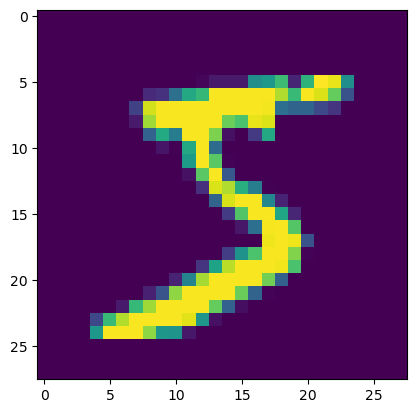

In [190]:
x_train[0].shape

plt.imshow(x_train[0])


In [191]:
y_train[0]

5

<class 'numpy.ndarray'>


(60000, 784)

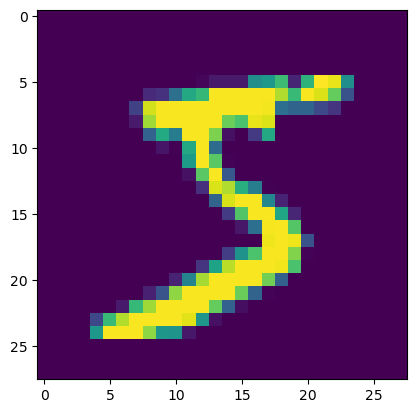

In [192]:
#normalize
x_train =  x_train/255
x_test = x_test/255

print(type(x_train))

plt.imshow(x_train[0])


#flatten the 28x28 pixel image to 784x1 

x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)
#check if flattened

x_train_flattened.shape

In [193]:
#define model
model = Sequential()
model.add(Dense(10, input_shape=(784,), activation='sigmoid'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5


d:\PROGRAMS\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8063 - loss: 0.7338
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9142 - loss: 0.3091
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9202 - loss: 0.2862
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9240 - loss: 0.2711
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9273 - loss: 0.2590


In [194]:
model.evaluate(x_test_flattened, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9161 - loss: 0.3028


[0.26609304547309875, 0.9258999824523926]

In [195]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step


In [196]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

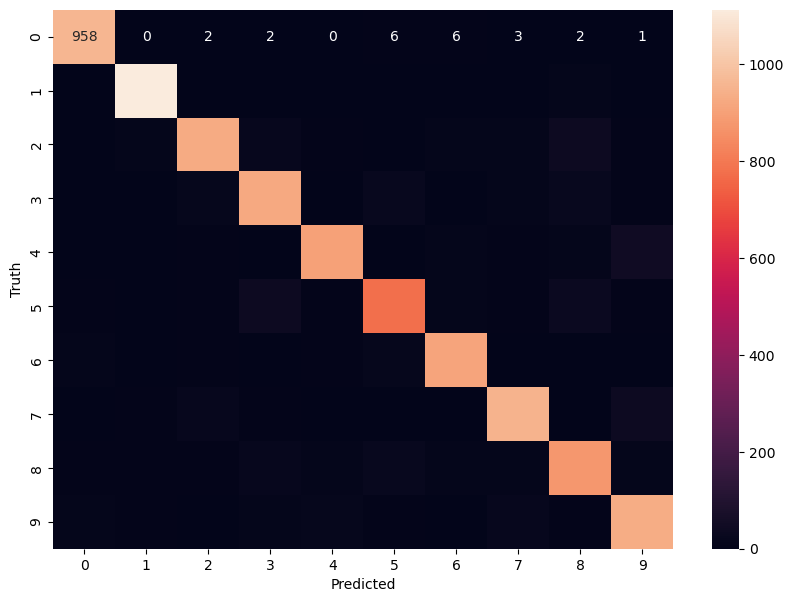

In [197]:
import seaborn as sn

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
